In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
task_folder = "results/alpha0.5_ni10_n200"

In [3]:
df = pd.read_csv(os.path.join(task_folder, "results.csv"))

In [4]:
df

,index,index_in_dataset,t_lava_vae_forward_gradient,t_lava_vae_bp_gradient,t_lava_vae_vanilla,t_lava_cae_forward_gradient,t_lava_cae_bp_gradient,t_lava_cae_vanilla,t_lava_cvae_forward_gradient,t_lava_cvae_bp_gradient,...,mse_lava_cvae_vanilla,valid_lava_vae_forward_gradient,valid_lava_vae_bp_gradient,valid_lava_vae_vanilla,valid_lava_cae_forward_gradient,valid_lava_cae_bp_gradient,valid_lava_cae_vanilla,valid_lava_cvae_forward_gradient,valid_lava_cvae_bp_gradient,valid_lava_cvae_vanilla
0,0,8374,1.778693,0.500679,0.345145,1.034235,0.353593,0.424374,0.515135,0.168182,...,NaN,ood,ood,ood,id,id,ood,ood,ood,NaN
1,2,5103,1.254479,0.575434,0.464878,1.833667,0.562018,0.728929,1.997706,0.648680,...,NaN,id,id,id,id,id,id,NaN,NaN,NaN
2,3,8963,0.963985,0.354952,0.355953,2.550994,0.622571,0.612910,1.996494,0.654903,...,NaN,id,id,id,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4993,1.246468,0.521255,0.516436,1.812339,0.610892,0.606204,1.961226,0.683768,...,NaN,id,id,id,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9069,0.422540,0.192972,0.188067,0.562862,0.199621,0.199852,0.406219,0.150881,...,NaN,id,id,id,id,id,id,id,id,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,136,9348,1.572715,0.598520,0.595828,1.856590,0.632210,0.624247,0.623631,0.223866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id,id,NaN
117,137,4079,1.387069,0.646605,0.635093,1.839045,0.623654,1.066936,0.646865,0.162215,...,NaN,id,id,id,id,id,id,id,id,NaN
118,138,9833,0.554186,0.246385,0.246543,1.094339,0.377578,0.376354,0.407725,0.155861,...,NaN,id,id,id,id,id,id,id,ood,NaN
119,139,1315,0.576406,0.253667,0.306304,0.753232,0.277136,0.267523,0.615387,0.214455,...,NaN,id,id,id,id,id,id,ood,id,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             121 non-null    int64  
 1   index_in_dataset                  121 non-null    int64  
 2   t_lava_vae_forward_gradient       121 non-null    float64
 3   t_lava_vae_bp_gradient            121 non-null    float64
 4   t_lava_vae_vanilla                121 non-null    float64
 5   t_lava_cae_forward_gradient       121 non-null    float64
 6   t_lava_cae_bp_gradient            121 non-null    float64
 7   t_lava_cae_vanilla                121 non-null    float64
 8   t_lava_cvae_forward_gradient      121 non-null    float64
 9   t_lava_cvae_bp_gradient           121 non-null    float64
 10  t_lava_cvae_vanilla               121 non-null    float64
 11  kl_lava_vae_forward_gradient      73 non-null     float64
 12  kl_lava_

# id_ratio

In [6]:
import numpy as np

In [7]:
valid_columns = [col for col in df.columns if col.startswith("valid")]

valid_ratios = df[valid_columns].apply(lambda col: np.mean([1  if v == "id" else 0 for v in col]))

vae_f      0.520661
vae_bp     0.504132
vae_v      0.512397
cae_f      0.371901
cae_bp     0.380165
cae_v      0.380165
cvae_f     0.528926
cvae_bp    0.570248
cvae_v     0.066116
dtype: float64


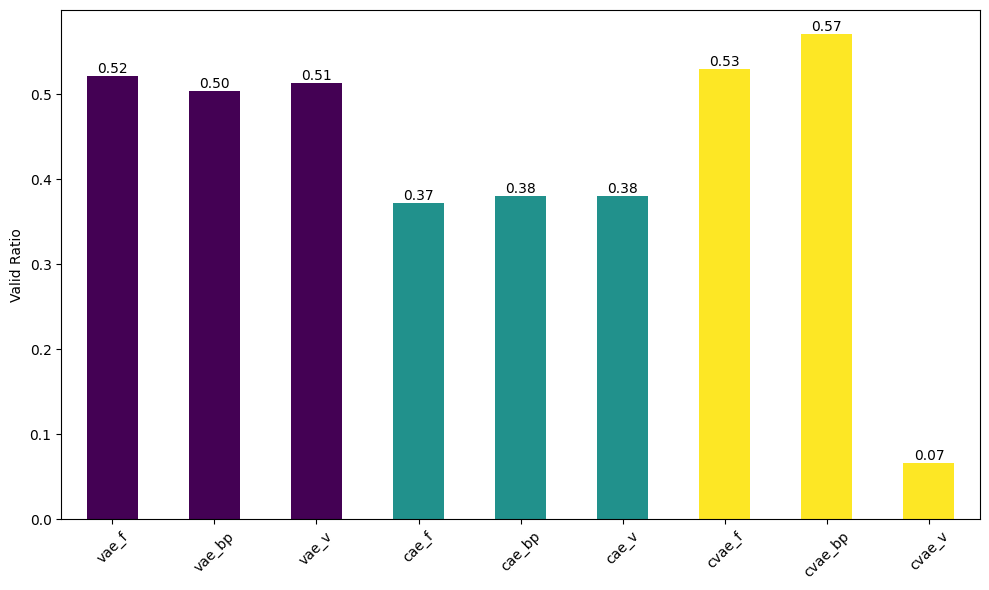

In [8]:

# Rename columns according to the specified rules
valid_ratios.index = valid_ratios.index.str.replace('_forward_gradient', '_f')
valid_ratios.index = valid_ratios.index.str.replace('_bp_gradient', '_bp')
valid_ratios.index = valid_ratios.index.str.replace('_vanilla', '_v')

valid_ratios.index = valid_ratios.index.str.replace('valid_lava_', '')

# Print the average times
print(valid_ratios)

cmap = cm.get_cmap('viridis', 3)
colors = [cmap(0) if col.startswith("vae") else cmap(1) if 'cae' in col else cmap(2) for col in valid_ratios.index]

plt.figure(figsize=(10, 6))
bars = valid_ratios.plot(kind='bar', color=colors)
# plt.title('Average Time for Each Algorithm')
plt.ylabel('Valid Ratio')
#plt.xlabel('Algorithm')
plt.xticks(rotation=45)
# plt.grid(True)

# Adding the value labels on top of the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.tight_layout()
plt.savefig('lava_average_time.pdf')
plt.show()